#### Feature Engineering
 - Exploring Features of the dataset
 - Hypothesis Testing
 - Checking for Normal Distribution using Transformations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns

In [2]:
df = pd.read_csv("data/cleaned.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### Hypothesis Testing
Checking correlation

In [4]:
df.corr(numeric_only=True)

,math score,reading score,writing score,total score,average
math score,1.000000,0.817580,0.802642,0.918746,0.918746
reading score,0.817580,1.000000,0.954598,0.970331,0.970331
writing score,0.802642,0.954598,1.000000,0.965667,0.965667
total score,0.918746,0.970331,0.965667,1.000000,1.000000
average,0.918746,0.970331,0.965667,1.000000,1.000000


In [5]:
num_data = ["math score", "reading score", "writing score"]

In [6]:
df.iloc[:, 5:8].columns

Index(['math score', 'reading score', 'writing score'], dtype='object')

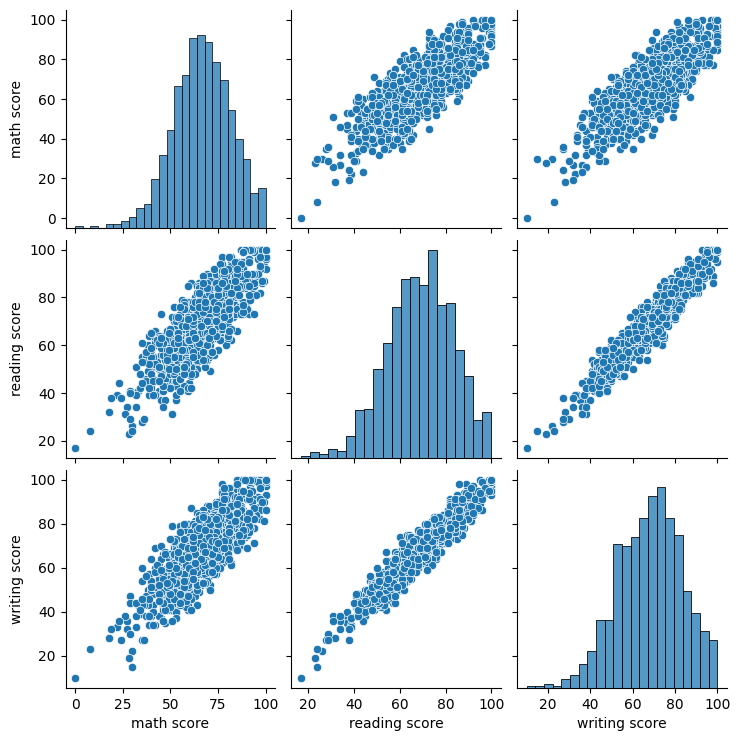

In [7]:
sns.pairplot(df.iloc[:, 5:8])

- All the pairplots seems to have a linear relationship with the other variable. To clarify that we'll plot the correlation map

In [8]:
num_features = [col for col in df.columns if df[col].dtype !='O']
num_df = df[num_features]

#### Shapiro Wilk Test
-  The Shapiro-Wilk test is a way to tell if a random sample comes from a normal distribution
-  Ho : Data is normally distributed
-  H1 : Data is not normally distributed

In [9]:
from scipy.stats import shapiro
shapiro_wilk_test = []
for column in num_features:
    dataToTest = num_df[column]
    stat,p = shapiro(dataToTest)
    if p > 0.05:
        shapiro_wilk_test.append("Normally Distributed")
    else:
        shapiro_wilk_test.append("Not Normally Distributed")

result = pd.DataFrame(data=[num_features, shapiro_wilk_test]).T
result.columns = ["Column Name", "Shapiro Hypothesis Result"]
result

,Column Name,Shapiro Hypothesis Result
0,math score,Not Normally Distributed
1,reading score,Not Normally Distributed
2,writing score,Not Normally Distributed
3,total score,Not Normally Distributed
4,average,Not Normally Distributed


#### K^2 Normality Test
- Test aims to establish whether or not the given sample comes from a normally ditributed population. Test is based on transformations of the sample kurtosis and skewness

- Ho = Data is Normally Distributed

- H1 = Data is not Normally Distributed

In [10]:
from scipy.stats import normaltest
normaltest_test = []
for column in num_features:
    dataToTest = num_df[column]
    stat, p = normaltest(dataToTest)
    if p > 0.05:
        normaltest_test.append("Normally Distributed")
    else:
        normaltest_test.append("Not Normally Distributed")

result = pd.DataFrame(data=[num_features, normaltest_test]).T
result.columns = ["Column Name", "normaltest Hypothesis Result"]
result

,Column Name,normaltest Hypothesis Result
0,math score,Not Normally Distributed
1,reading score,Not Normally Distributed
2,writing score,Not Normally Distributed
3,total score,Not Normally Distributed
4,average,Not Normally Distributed


#### Spearmanr Test
 - Spearman Rank Correlation, which is used to measure the correlation between two ranked variables
 - Whereas The Person Correlation Coefficient is computed using raw data values
 - Unlike the Pearson correlation, the Spearman correlation does not assume that bothe datasets are normally distributed
 - Spearman rank correlation is closely related to the Pearson correlation, and both are bounded value, from -1 to 1 denoting a correlation between two variables

 - Ho: Independent Samples
 - H1: Dependent Samples

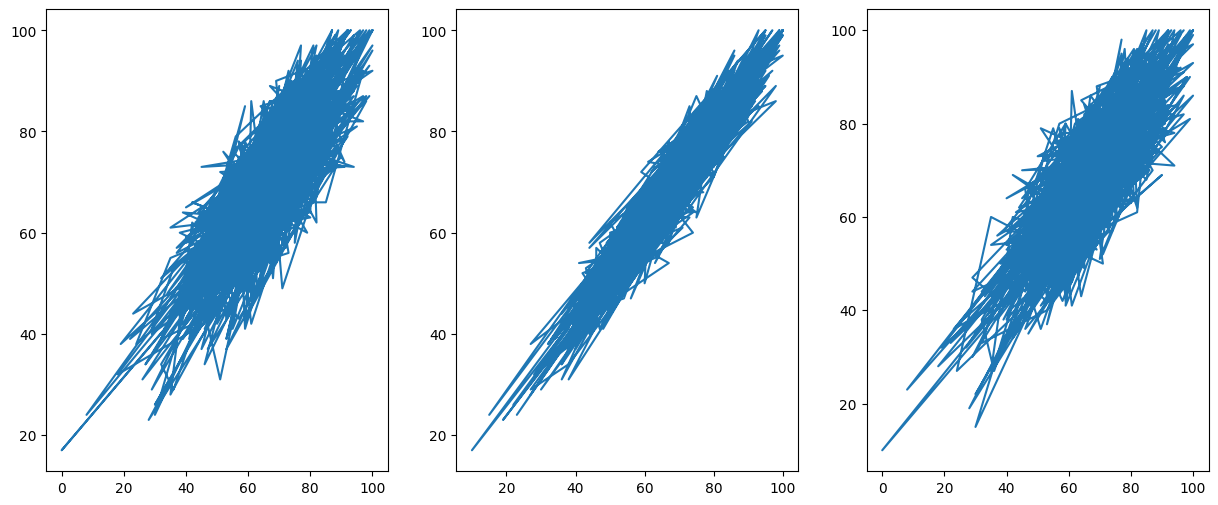

In [11]:
plt.rcParams["figure.figsize"] = (15,6)
plt.subplot(1,3,1)
plt.plot(num_df["math score"], num_df["reading score"])
plt.subplot(1,3,2)
plt.plot(num_df["writing score"], num_df["reading score"])
plt.subplot(1,3,3)
plt.plot(num_df["math score"], num_df["writing score"])
plt.show()

In [12]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

def test_correlation(test_name, column1, column2):
    column1_to_test = num_df[column1]
    column2_to_test = num_df[column2]
    stats, p = test_name(column1_to_test, column2_to_test)
    d= dict()
    d['col1'] = column1
    d['col2'] = column2
    if p>0.05:
        test_results.append("Independent Samples")
    else:
        test_results.append("Dependent Samples")
    columns_combination.append(d)    

In [13]:
columns_combination = []
test_results = []

test_correlation(spearmanr, 'math score', 'reading score')
test_correlation(spearmanr, 'math score', 'writing score')
test_correlation(spearmanr, 'reading score', 'writing score')

In [14]:
df_spearmanr = pd.DataFrame(columns_combination, test_results)
df_spearmanr

,col1,col2
Dependent Samples,math score,reading score
Dependent Samples,math score,writing score
Dependent Samples,reading score,writing score


#### pearsonr Test
- Ho: Independent Samples
- H1: Dependent Samples

In [15]:
columns_combination = []
test_results = []

test_correlation(pearsonr, 'math score', 'reading score')
test_correlation(pearsonr, 'writing score', 'reading score')
test_correlation(pearsonr, 'math score', 'writing score')

In [16]:
df_pearsonr = pd.DataFrame(columns_combination, test_results)
df_pearsonr

,col1,col2
Dependent Samples,math score,reading score
Dependent Samples,writing score,reading score
Dependent Samples,math score,writing score


- At 5% level of significance
- From above two tests of Pearson and Spearmanr
- Since all the three p-values are more than 0.05
- Inference: The score have a correlation between them

In [17]:
categorical_features = [column for column in df.columns if df[column].dtype == 'O']

#### Chi-squared Test
 - Tests whether two or more categorial features are dependent or not
 - Here we will test correlation of Categorical columns with Target column ie. average
 - Assumptions:
 - All are Independet Observation
 - Size of each box of contingency table > 25

In [18]:
from scipy.stats import chi2_contingency
chi2_squared_test = []
for feature in categorical_features:
    stat, p, dof, expected = chi2_contingency(pd.crosstab(df['average'], df[feature]))
    if p > 0.05:
        chi2_squared_test.append("Independent Categories")
    else:
        chi2_squared_test.append("Dependent Categories")

result = pd.DataFrame(data=[categorical_features, chi2_squared_test]).T
result.columns = ["Column", "Hypothesis Result"]
result
                                 
    

,Column,Hypothesis Result
0,gender,Independent Categories
1,race/ethnicity,Independent Categories
2,parental level of education,Independent Categories
3,lunch,Dependent Categories
4,test preparation course,Dependent Categories


Our output depends on lunch and test prepration course

#### Levene's Test
- Ho: Female and male have have equal variance
- H1: Female and male do not have equal variance

In [22]:
import scipy
math_var = scipy.stats.levene(df[df["gender"]=="female"]["math score"],
                              df[df["gender"]=="male"]["math score"], center= 'mean')

reading_var = scipy.stats.levene(df[df["gender"]=="female"]["reading score"],
                                df[df["gender"]=="male"]["reading score"], center="mean")

writing_var = scipy.stats.levene(df[df["gender"]=="female"]["writing score"],
                                 df[df["gender"]=="male"]["writing score"], center="mean")

print("Test Statistic and p-value for math is", math_var)

print("Test Statistic and p-value for writing  is", writing_var)

print("Test Statistic and p-value for reading is ", reading_var)

Test Statistic and p-value for math is LeveneResult(statistic=np.float64(0.39659058260357727), pvalue=np.float64(0.5289994390328784))
Test Statistic and p-value for writing  is LeveneResult(statistic=np.float64(0.029036281877215228), pvalue=np.float64(0.8647298283415281))
Test Statistic and p-value for reading is  LeveneResult(statistic=np.float64(0.016652697287322132), pvalue=np.float64(0.8973477814233404))


Result:
- Conclusion: Since, at 5% level of significance, P(calculated) > P(0.05)
- Therefor we will accept the null hypothesis
- Inference: All the score have equal variance with respect to gender

**Checking Corrlation using Heatmaps**

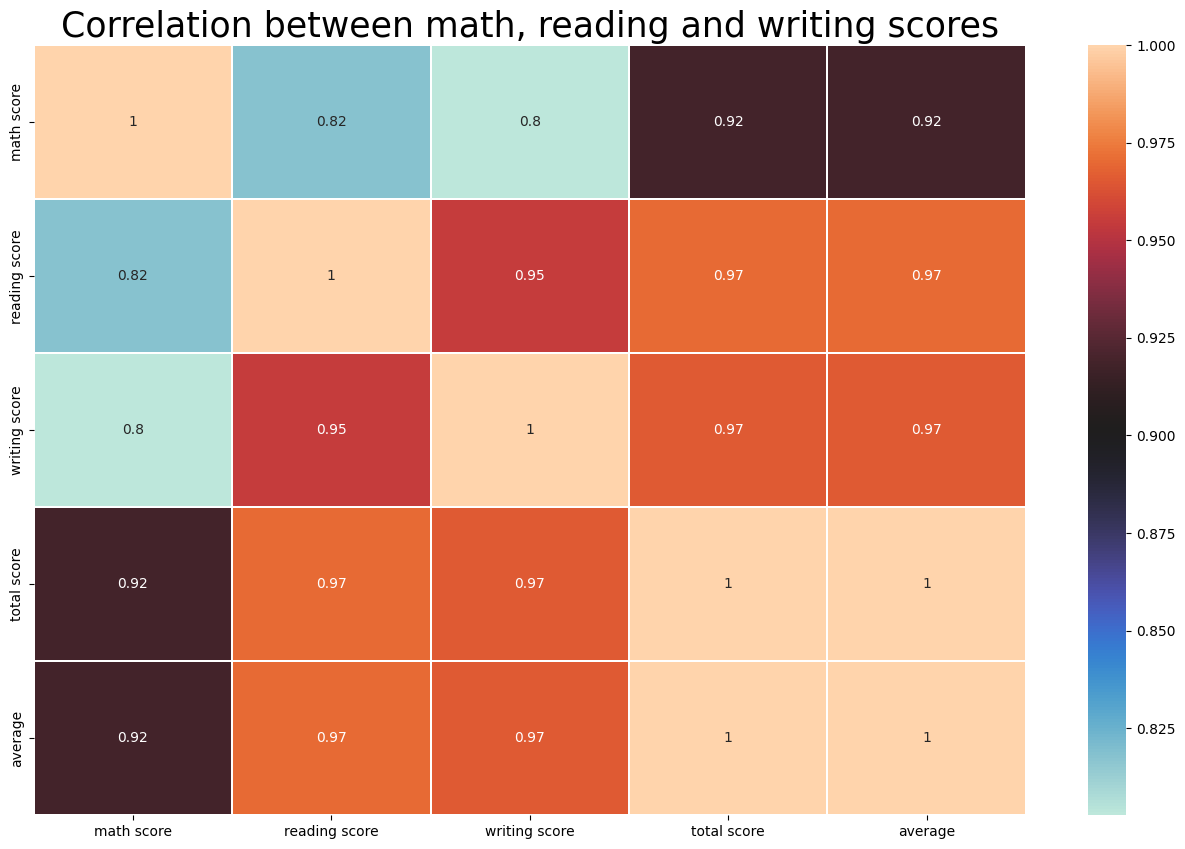

In [32]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="icefire", linewidths=0.2)  #data.corr() --> correlation matrix

fig = plt.gcf()
fig.set_size_inches(16,10)
plt.title("Correlation between math, reading and writing scores", color="black", size=25)
plt.show()

- Total Score is highy correlated with individual score
- Reading score is alos highly correlated with writing score which means students who read well can also writes well
- Math score doesn;;t have much high correlation so it is not necessary that if a student performs well in maths has to perform well in other aspects or vice versa
- Total score and average are highly correlared, hence we can delete one amoung them

#### Checking for Normal Distribution using Transformations
Q-Q plot (to check if data is normally distributed or not)

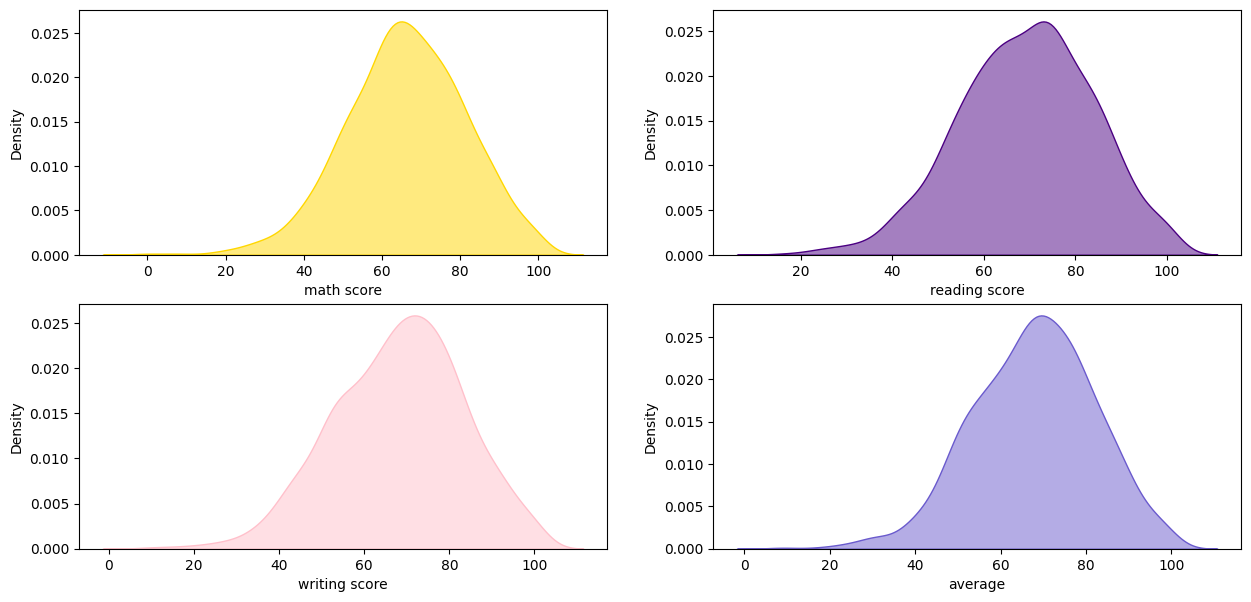

In [38]:
fig, axes = plt.subplots(2,2, figsize=(15,7))
sns.kdeplot(df['math score'], fill=True, label="Maths", color="gold", ax=axes[0,0], alpha=0.5)
sns.kdeplot(df["reading score"], fill=True, label="Reading", color="indigo", ax=axes[0,1], alpha=0.5)
sns.kdeplot(df["writing score"], fill=True, label="Writing", color="pink", ax=axes[1,0], alpha=0.5)
sns.kdeplot(df["average"], fill=True, label="average", color="slateblue", ax=axes[1,1], alpha=0.5)
plt.show()

In [58]:
def plots(df, var, log_df):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.histplot(df[var], kde=True)
    plt.title("before")
    plt.subplot(122)
    sns.histplot(log_df, kde=True)
    plt.title("After")
    plt.show()

#### Log Transform

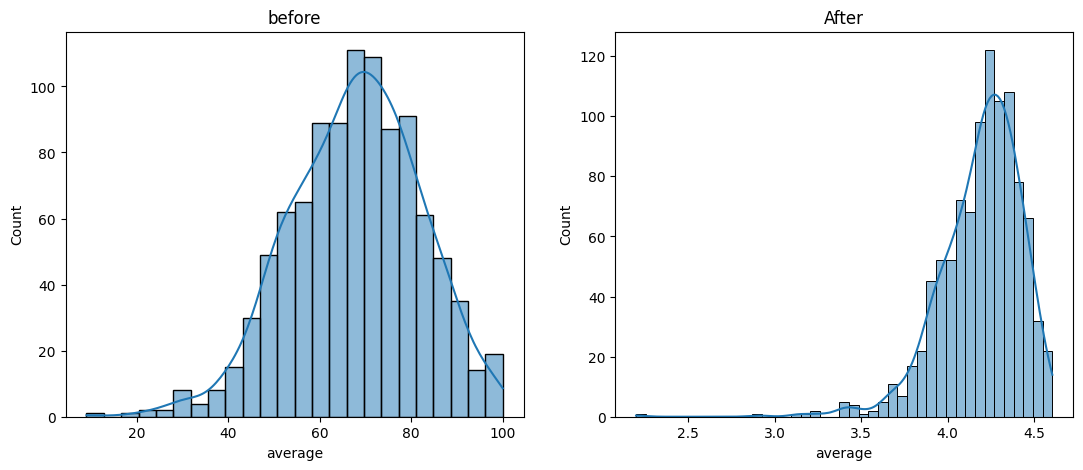

Skewness value -1.5373448376786043


In [59]:
plots(df,"average", np.log(df["average"]))
print("Skewness value", np.log(df["average"]).skew())

A negatively skewed (also known as left-skewed) distribution is a type of distribution in which more values are concentrated on the right side(tail) of the ditsribution graph while the left tail of the distribution graph is longer

#### Square Root Transform

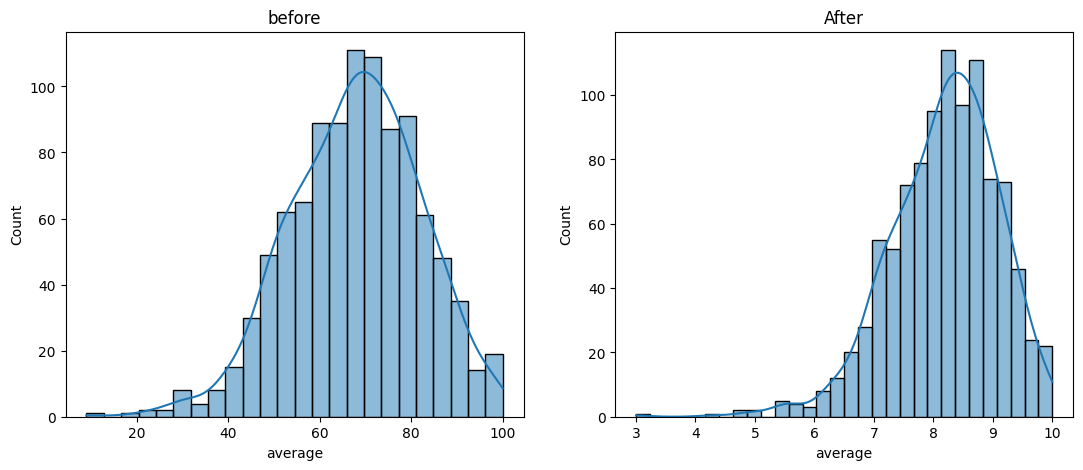

Skewness values -0.7534310044571916


In [61]:
plots(df, "average", np.sqrt(df["average"]))
print("Skewness values", np.sqrt(df["average"]).skew())

#### Box-Cox Transform
your data must be positive

In [71]:
def plot_qq_plot(column):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(df[column], kde=True)
    plt.title(f"{column} pdf")
    plt.subplot(122)
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title("{column} QQ Plot")
    plt.show()

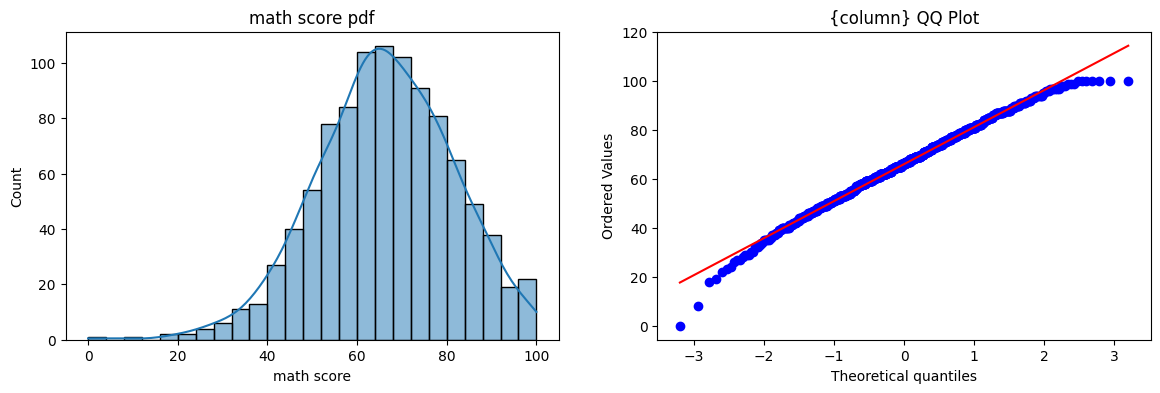

In [72]:
plot_qq_plot("math score")

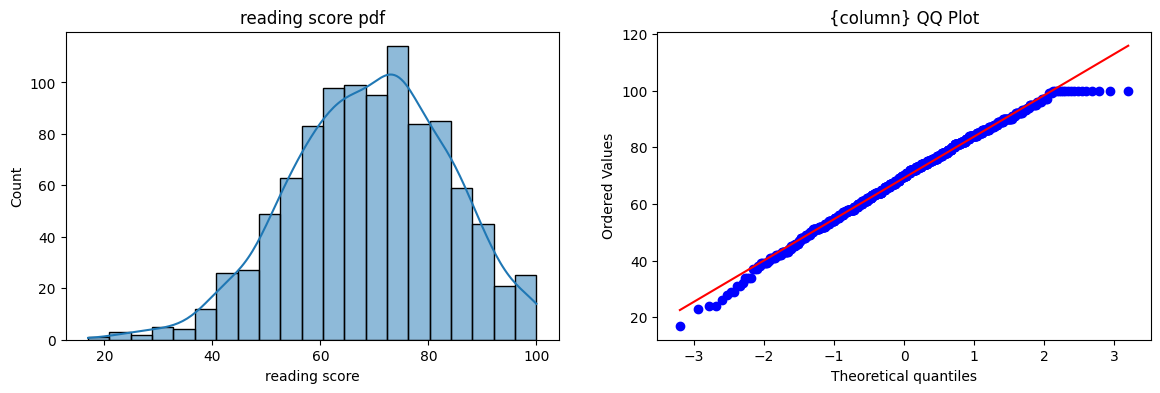

In [73]:
plot_qq_plot("reading score")

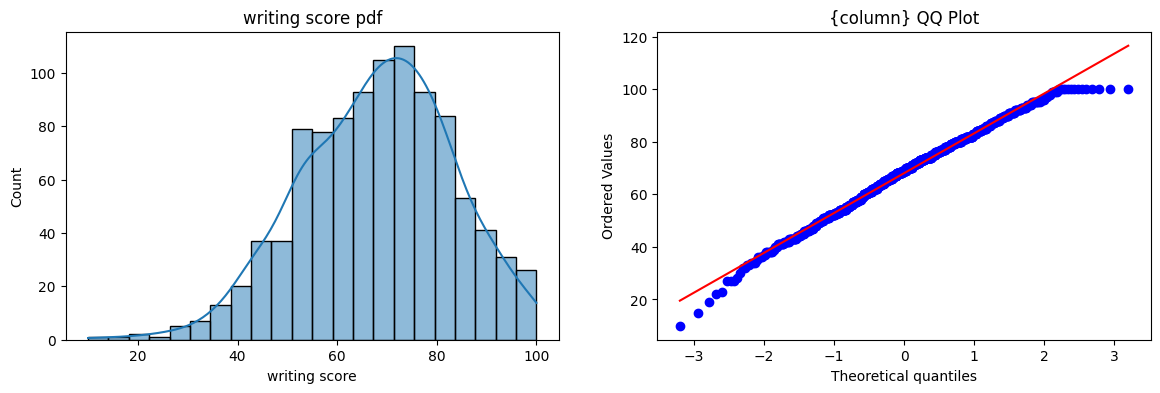

In [74]:
plot_qq_plot("writing score")

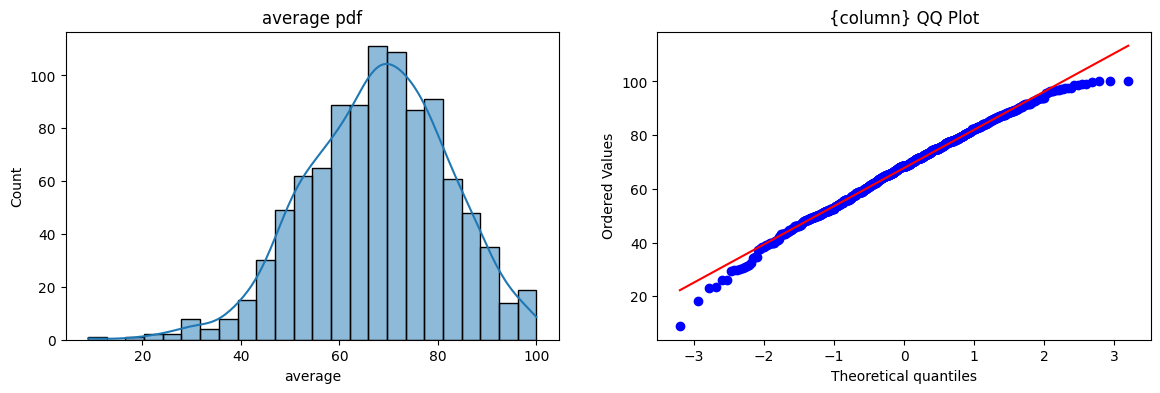

In [75]:
plot_qq_plot("average")

- For range -2 to 2 avg_score & math score follows normal distribution, 
- but for values less than -2 and for value greater than 2 it doesn't follow normal distribution

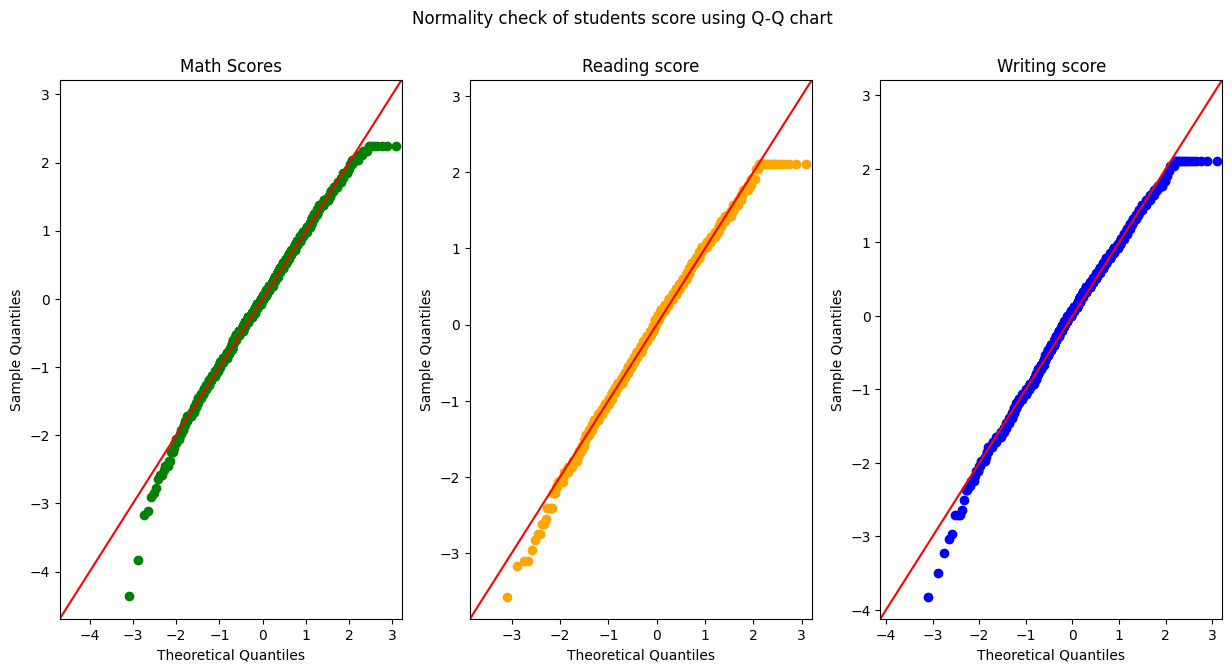

In [80]:
import statsmodels.api as sm # to build the Q-Q graph

fig, ax = plt.subplots(ncols=3, figsize=(15,7))

sm.qqplot(df["math score"], markerfacecolor="green", markeredgecolor="green", line="45", fit=True, ax=ax[0])
ax[0].set_title("Math Scores")

sm.qqplot(df["reading score"], markerfacecolor="orange", markeredgecolor="orange", line='45', fit=True, ax=ax[1])
ax[1].set_title("Reading score")

sm.qqplot(df["writing score"], markerfacecolor="blue", markeredgecolor="blue", line="45", fit=True, ax=ax[2])
ax[2].set_title("Writing score")

plt.suptitle("Normality check of students score using Q-Q chart")
plt.show()

There exist correlation between students score and the normal distribution line. This means that our data is very close to Guassian